# **DATATHON 2023 YARIŞMASI     -TENSÖR-**

In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))
        
import warnings
warnings.filterwarnings("ignore")

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/datathon2023/sample_submission.csv
/kaggle/input/datathon2023/test_x.csv
/kaggle/input/datathon2023/train.csv


# **VERİ SETİ YÜKLEME VE İNCELEME AŞAMASI**

In [2]:
train_df=pd.read_csv("/kaggle/input/datathon2023/train.csv") #Veri setini dahil etme.
train_df.head() # Veri setinin ilk 5 verisini getirme

,index,Cinsiyet,Yaş Grubu,Medeni Durum,Eğitim Düzeyi,İstihdam Durumu,Yıllık Ortalama Gelir,Yaşadığı Şehir,En Çok İlgilendiği Ürün Grubu,Yıllık Ortalama Satın Alım Miktarı,Yıllık Ortalama Sipariş Verilen Ürün Adedi,Eğitime Devam Etme Durumu,Öbek İsmi,Yıllık Ortalama Sepete Atılan Ürün Adedi
0,0,Kadın,31-40,Bekar,Yüksek Lisans Mezunu,Düzenli ve Ücretli Bir İşi Var,748266.440879,Büyük Şehir,Elektronik ve Teknolojik Ürünler,32010.900881,37.310644,Etmiyor,obek_4,102.936904
1,1,Erkek,>60,Evli,Lise Mezunu,Kendi İşinin Sahibi,246298.609605,Küçük Şehir,Spor Malzemeleri,4145.729891,11.554851,Etmiyor,obek_5,82.176053
2,2,Erkek,18-30,Bekar,Lise Mezunu,Düzenli ve Ücretli Bir İşi Var,268582.732360,Küçük Şehir,Giyim,9924.379414,55.353236,Ediyor,obek_8,141.661426
3,3,Erkek,51-60,Evli,Lise Mezunu,Kendi İşinin Sahibi,327721.837865,Kırsal,Giyim,6417.780714,15.417239,Etmiyor,obek_3,17.097397
4,4,Erkek,31-40,Evli,Ortaokul Mezunu,İşsiz veya Düzenli Bir İşi Yok,397431.626948,Büyük Şehir,Giyim,7886.663061,14.689837,Etmiyor,obek_3,20.470459


In [3]:
train_df.shape #Veri setimizin satır sütun bilgisi

(5460, 14)

In [4]:
train_df.info() # Veri seti hakkında bilgi edinme, dtypes: sütünların veri tipleri

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5460 entries, 0 to 5459
Data columns (total 14 columns):
 #   Column                                      Non-Null Count  Dtype  
---  ------                                      --------------  -----  
 0   index                                       5460 non-null   int64  
 1   Cinsiyet                                    5460 non-null   object 
 2   Yaş Grubu                                   5460 non-null   object 
 3   Medeni Durum                                5460 non-null   object 
 4   Eğitim Düzeyi                               5460 non-null   object 
 5   İstihdam Durumu                             5460 non-null   object 
 6   Yıllık Ortalama Gelir                       5460 non-null   float64
 7   Yaşadığı Şehir                              5460 non-null   object 
 8   En Çok İlgilendiği Ürün Grubu               5460 non-null   object 
 9   Yıllık Ortalama Satın Alım Miktarı          5460 non-null   float64
 10  Yıllık Ortal

In [5]:
train_df.nunique() #Sütunlardaki toplam eşsiz değer sayısı

index                                         5460
Cinsiyet                                         2
Yaş Grubu                                        5
Medeni Durum                                     2
Eğitim Düzeyi                                    9
İstihdam Durumu                                  4
Yıllık Ortalama Gelir                         5460
Yaşadığı Şehir                                   4
En Çok İlgilendiği Ürün Grubu                    5
Yıllık Ortalama Satın Alım Miktarı            5460
Yıllık Ortalama Sipariş Verilen Ürün Adedi    5422
Eğitime Devam Etme Durumu                        2
Öbek İsmi                                        8
Yıllık Ortalama Sepete Atılan Ürün Adedi      5460
dtype: int64

In [6]:
train_df.describe() #Sayısal değişkenlerin istatistiksel değerlerinin incelenmesi 

,index,Yıllık Ortalama Gelir,Yıllık Ortalama Satın Alım Miktarı,Yıllık Ortalama Sipariş Verilen Ürün Adedi,Yıllık Ortalama Sepete Atılan Ürün Adedi
count,5460.000000,5.460000e+03,5460.000000,5460.000000,5460.000000
mean,2729.500000,3.635711e+05,16616.612217,24.040884,73.445693
std,1576.310566,2.197144e+05,14099.171704,14.945655,47.214184
min,0.000000,4.392299e+04,2859.254000,0.000000,3.977559
25%,1364.750000,2.156934e+05,4931.859057,11.550502,25.009168
50%,2729.500000,2.869254e+05,8426.818967,20.095924,82.485579
75%,4094.250000,4.681882e+05,30579.244695,35.918161,104.473291
max,5459.000000,1.192437e+06,48605.594415,64.616196,242.308441


# **VERİ SETİNDEKİ KATEGORİK VE NUMERİK SÜTUNLARIN GÖRSELLEŞTİRİLMESİ**

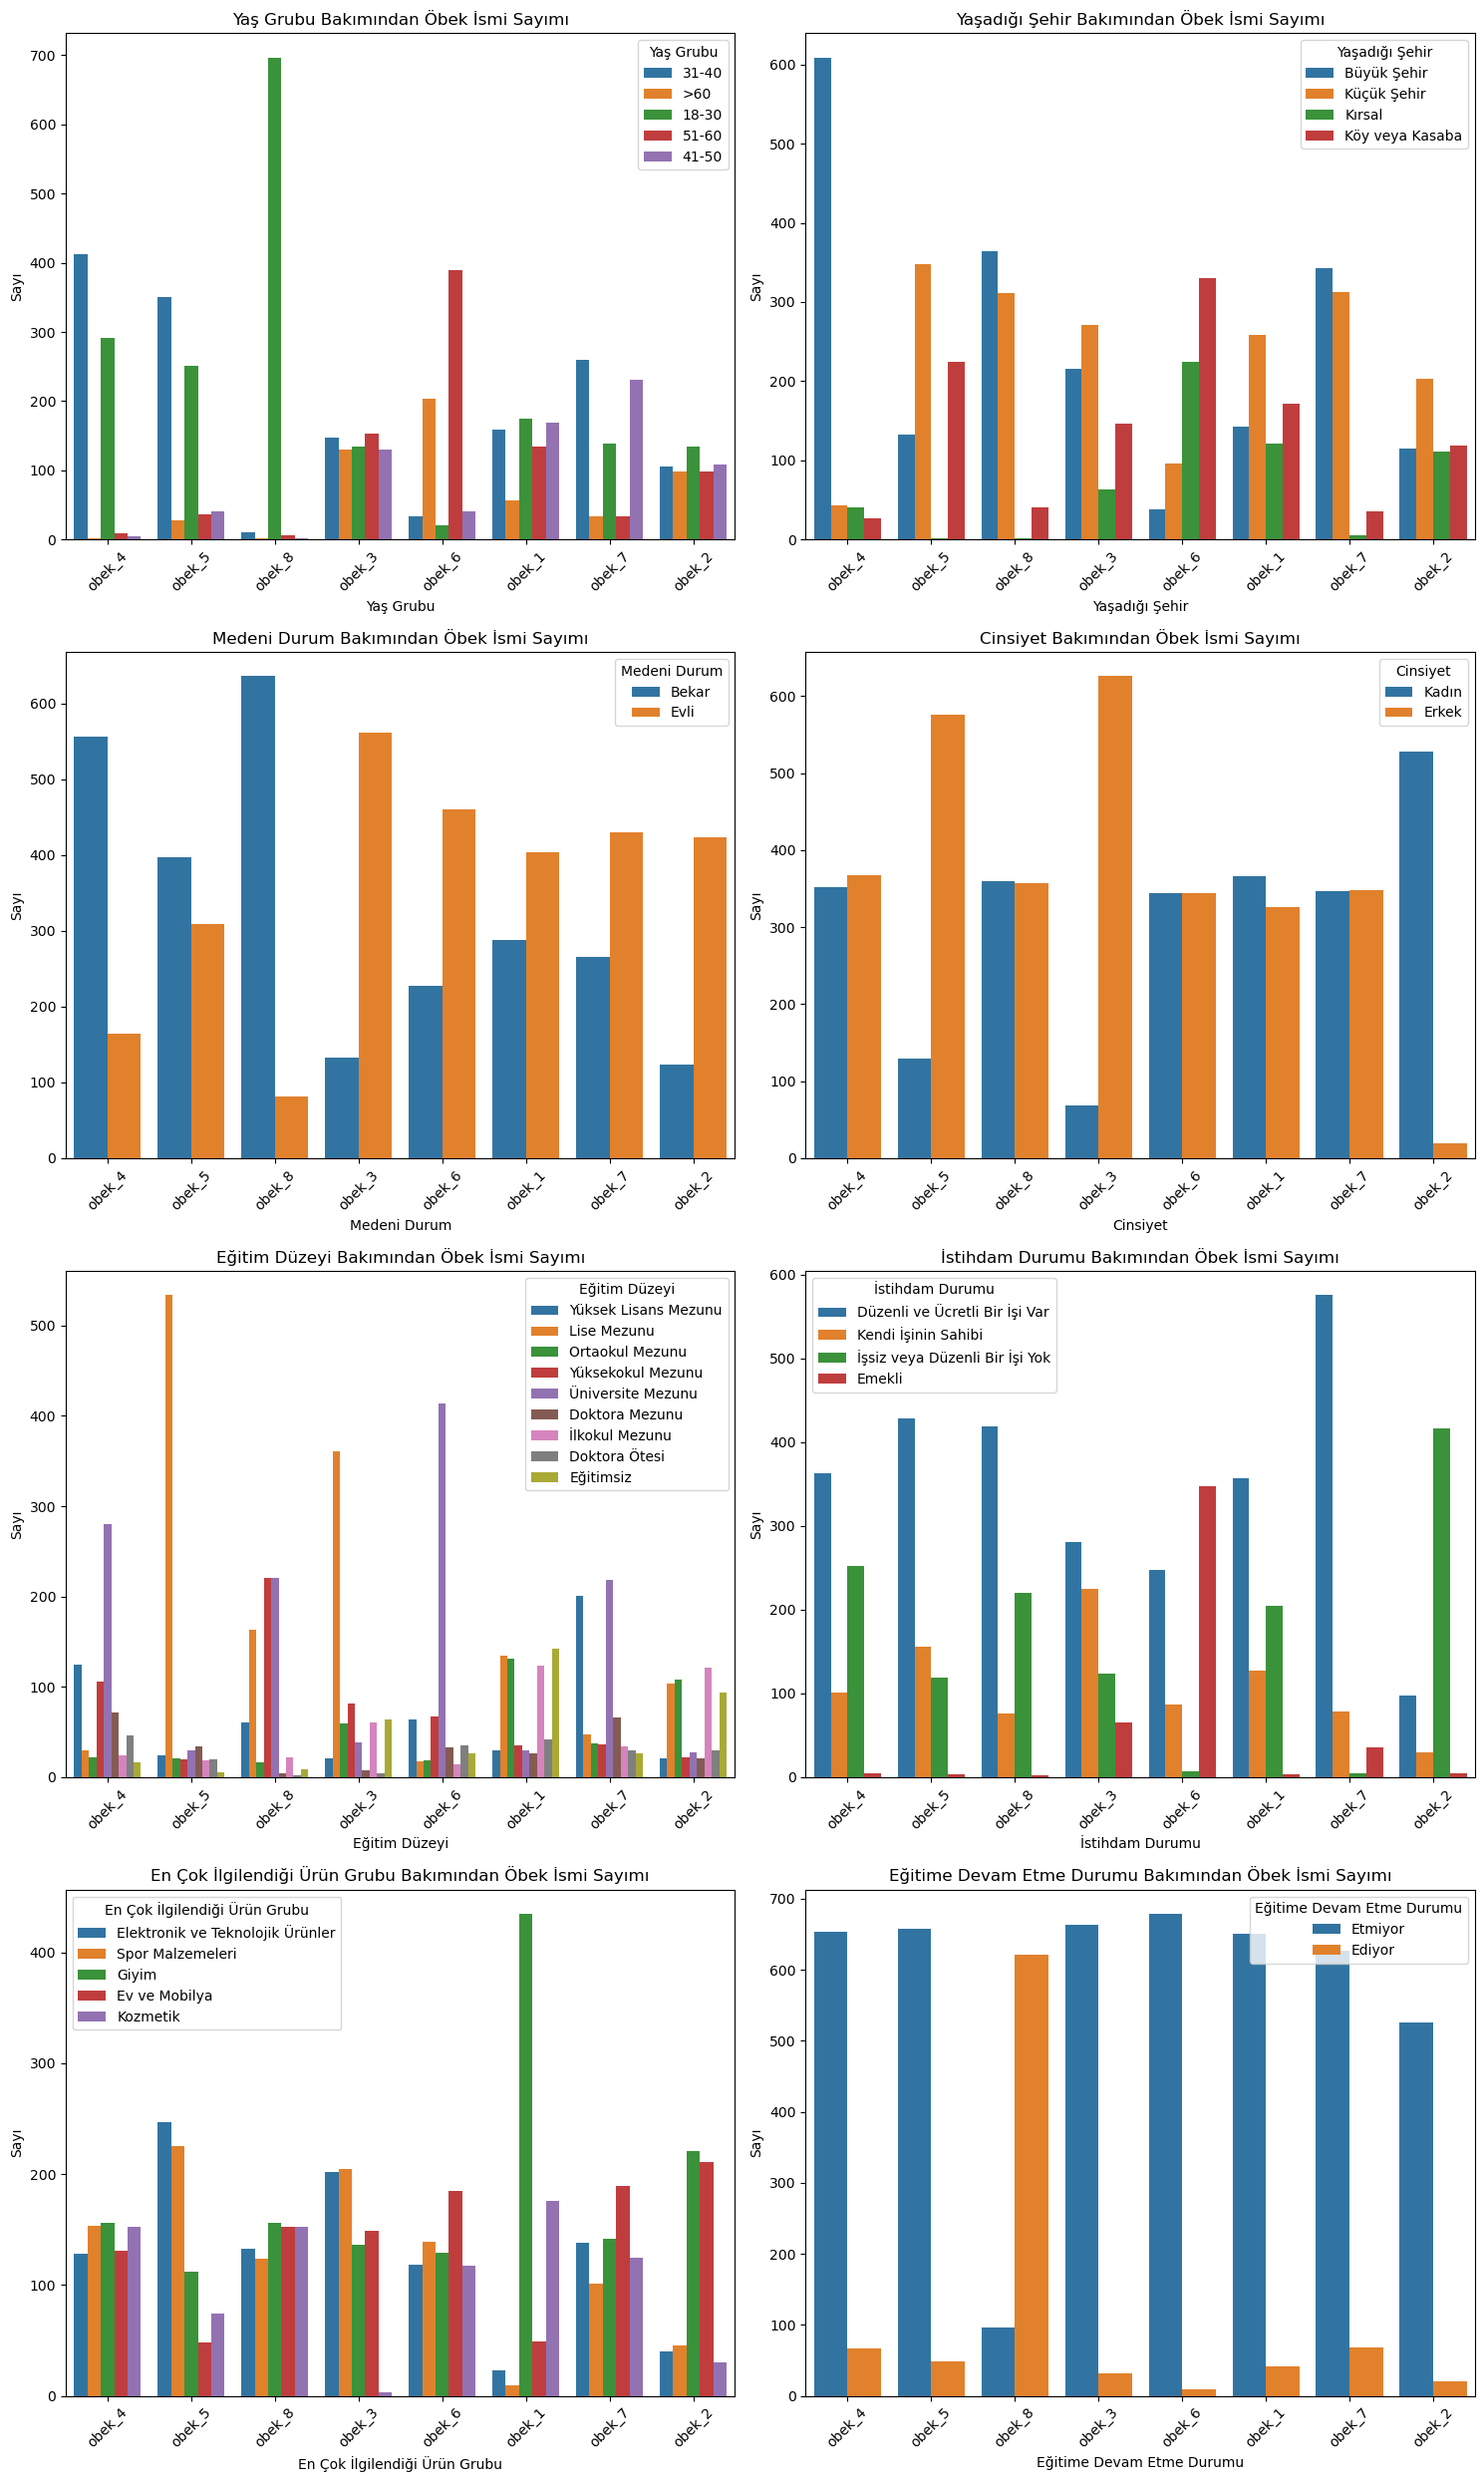

In [7]:
import matplotlib.pyplot as plt
import seaborn as sns

# Bu görselleştirme ile öbeklere göre kategorik kolonlarının dağılımlımları görselleştirilmiştir. 

fig, axes = plt.subplots(4, 2, figsize=(15, 25)) 

cat_columns_list=["Yaş Grubu","Yaşadığı Şehir","Medeni Durum","Cinsiyet","Eğitim Düzeyi",
                  "İstihdam Durumu","En Çok İlgilendiği Ürün Grubu","Eğitime Devam Etme Durumu"] # Veri setimizdeki categorik kolonlar

cat_sayac=0
for i in range(4):
    for j in range(2):
        sns.countplot(hue=cat_columns_list[cat_sayac], data=train_df, x="Öbek İsmi", ax=axes[i, j]) 
        axes[i, j].set_title('{} Bakımından Öbek İsmi Sayımı'.format(cat_columns_list[cat_sayac]))
        axes[i, j].set_xlabel(cat_columns_list[cat_sayac])
        axes[i, j].set_ylabel('Sayı')
        axes[i, j].tick_params(axis='x', rotation=45)
        cat_sayac+=1


plt.tight_layout()
plt.show()

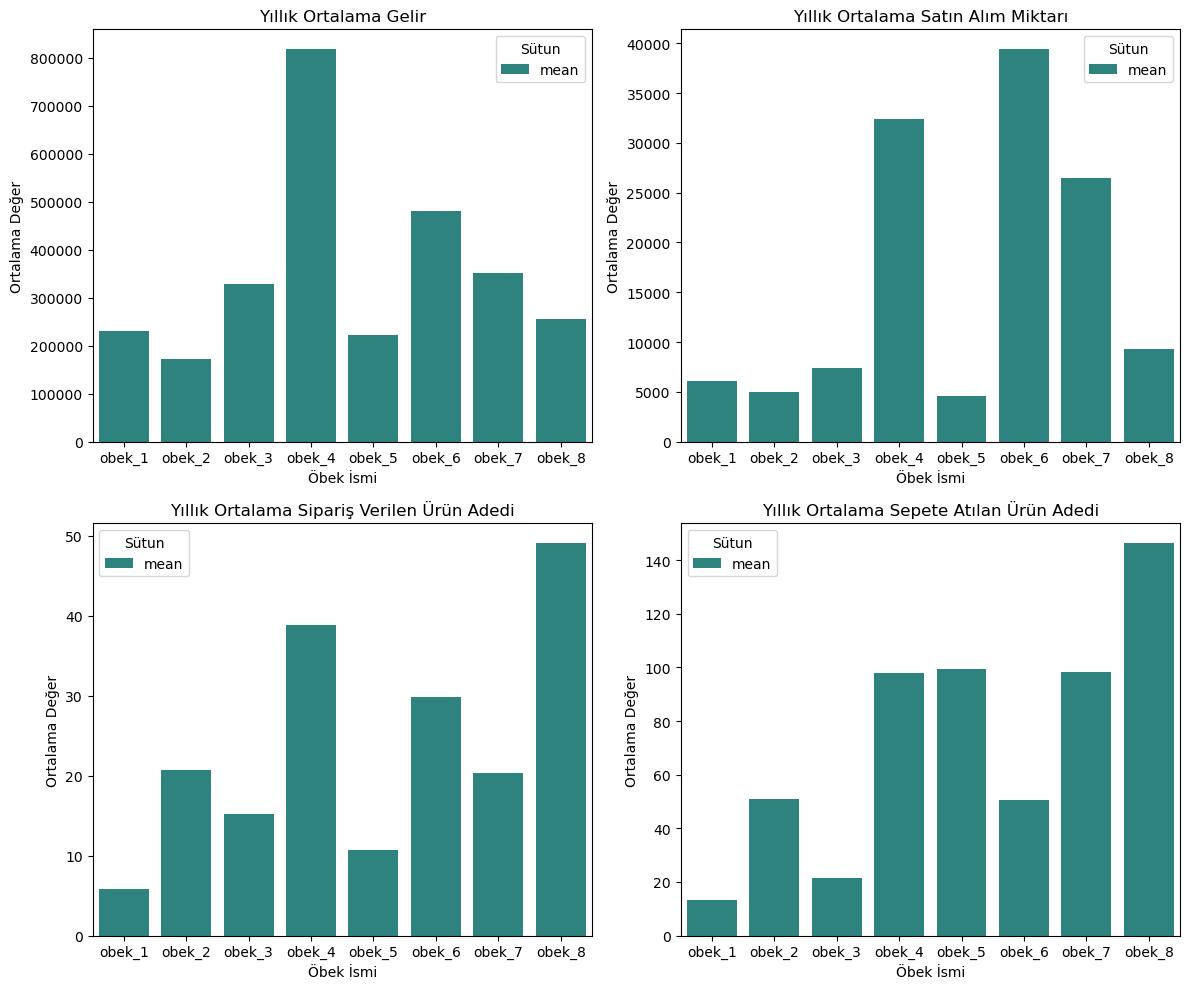

In [8]:
grouped_df = train_df.groupby(["Öbek İsmi"]).agg(["mean"]).drop(["index"], axis=1) # Öbek İsmi kolonuna göre bir gruplama işlemi gerçekleştirilmiştir. 
# Numerik değerler üzerinde ortalama göz önüne alınarak bir dataframe oluşturulmuş ve bu dataframe aşağıdaki gibi görselleştirilmiştir.
# Böylelikle öbeklere göre numerik değerlerinin ortalamalarına bakılarak çıkarım yapılmaktadır. Örn: Ortalama gelir düzeyi yüksek, Satın alım miktarı ortalamanın üzerinde vb.

fig, axes = plt.subplots(2, 2, figsize=(12, 10))
axes = axes.flatten()  # Axes nesnelerini tek boyutlu bir diziye dönüştürme

for i, column in enumerate(grouped_df.columns):
    
    mean_values = grouped_df[column[0]]["mean"]
    mean_values_melted = mean_values.reset_index().melt(id_vars=["Öbek İsmi"], var_name="Sütun", value_name="Ortalama")
    sns.barplot(data=mean_values_melted, x="Öbek İsmi", y="Ortalama", hue="Sütun", palette="viridis", ax=axes[i])
    axes[i].set_xlabel("Öbek İsmi")
    axes[i].set_ylabel("Ortalama Değer")
    axes[i].set_title(column[0])
    axes[i].legend(title="Sütun")

plt.tight_layout()  # Grafikler arasındaki boşlukları ayarlama
plt.show()

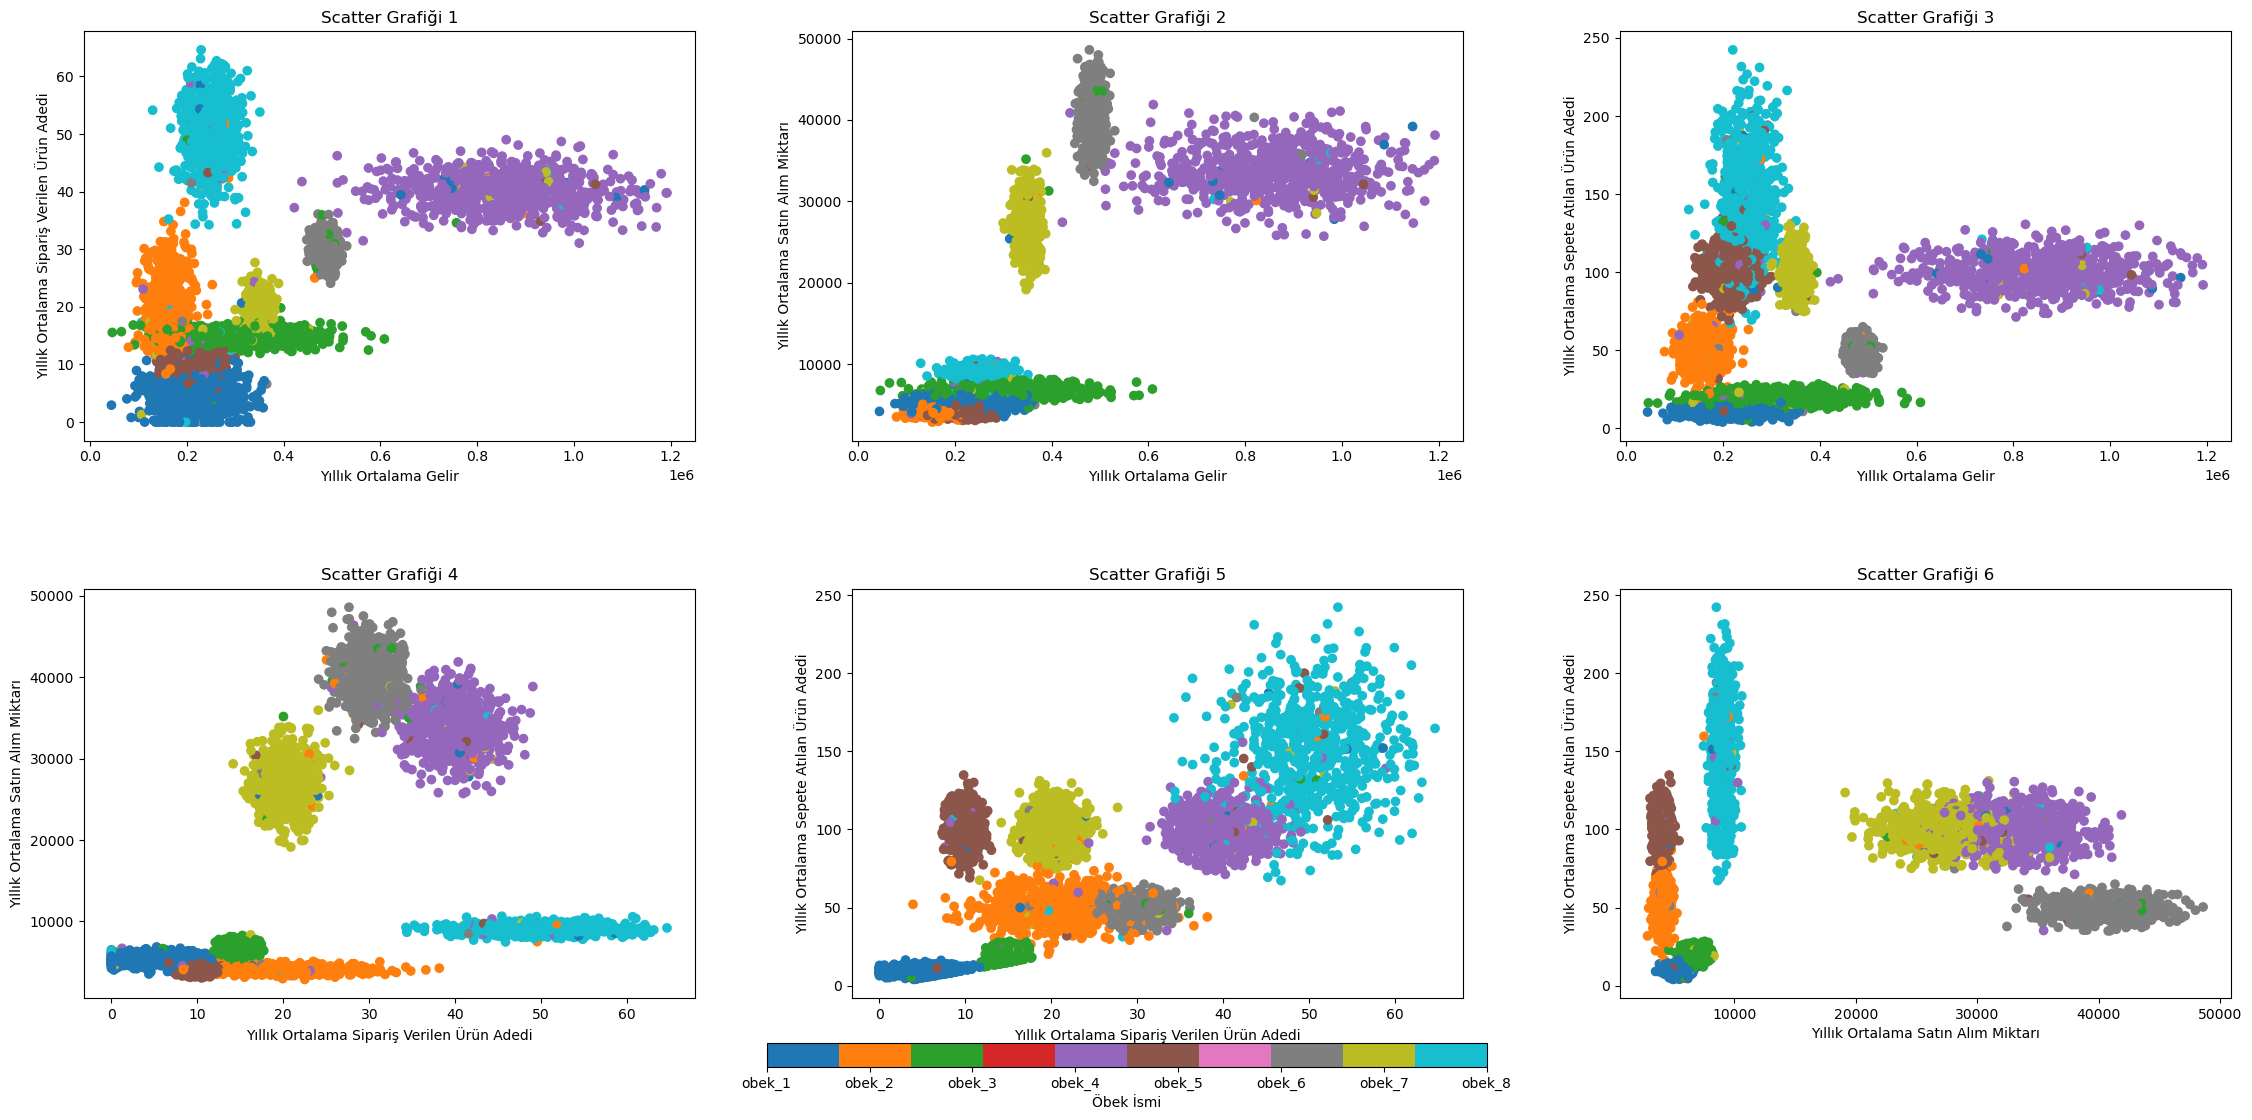

In [9]:
# Bu görselleştirme ile her öbeğin numerik kolonlarının birbirleri arasındaki dağılımlar gözlemlenmiştir. 

label_mapping = {'obek_1': 0, 'obek_2': 1, 'obek_3': 2, 'obek_4': 3, 'obek_5': 4, 'obek_6': 5, 'obek_7': 6, 'obek_8': 7}
Y_numeric = np.array([label_mapping[label] for label in train_df["Öbek İsmi"]])

#Renk skalası oluşturma
cmap = plt.get_cmap("tab10")
norm = plt.Normalize(Y_numeric.min(), Y_numeric.max())

fig, axes = plt.subplots(2, 3, figsize=(24, 12))

num_columns_list = [["Yıllık Ortalama Gelir","Yıllık Ortalama Sipariş Verilen Ürün Adedi"],
               ["Yıllık Ortalama Gelir","Yıllık Ortalama Satın Alım Miktarı"],
               ["Yıllık Ortalama Gelir","Yıllık Ortalama Sepete Atılan Ürün Adedi"],
               ["Yıllık Ortalama Sipariş Verilen Ürün Adedi","Yıllık Ortalama Satın Alım Miktarı"],
               ["Yıllık Ortalama Sipariş Verilen Ürün Adedi","Yıllık Ortalama Sepete Atılan Ürün Adedi"],
               ["Yıllık Ortalama Satın Alım Miktarı","Yıllık Ortalama Sepete Atılan Ürün Adedi"]]

num_sayac = 0
for i in range(2):
    for j in range(3):
        scatter = axes[i, j].scatter(train_df[num_columns_list[num_sayac][0]], train_df[num_columns_list[num_sayac][1]], c=Y_numeric, cmap=cmap, norm=norm)
        axes[i, j].set_xlabel(num_columns_list[num_sayac][0])
        axes[i, j].set_ylabel(num_columns_list[num_sayac][1])
        axes[i, j].set_title("Scatter Grafiği {}".format(num_sayac+1))
        num_sayac += 1

#Renk skalasını ekleme
cbar_ax = fig.add_axes([0.35, 0.05, 0.3, 0.02]) 
cbar = fig.colorbar(scatter, cax=cbar_ax, ticks=np.arange(len(label_mapping)), orientation='horizontal')
cbar.set_label("Öbek İsmi")
cbar.set_ticklabels(list(label_mapping.keys()))

plt.tight_layout(pad=6)
plt.show()

# **VERİ ÖN İŞLEME AŞAMASI**

In [10]:
train_df.head()

,index,Cinsiyet,Yaş Grubu,Medeni Durum,Eğitim Düzeyi,İstihdam Durumu,Yıllık Ortalama Gelir,Yaşadığı Şehir,En Çok İlgilendiği Ürün Grubu,Yıllık Ortalama Satın Alım Miktarı,Yıllık Ortalama Sipariş Verilen Ürün Adedi,Eğitime Devam Etme Durumu,Öbek İsmi,Yıllık Ortalama Sepete Atılan Ürün Adedi
0,0,Kadın,31-40,Bekar,Yüksek Lisans Mezunu,Düzenli ve Ücretli Bir İşi Var,748266.440879,Büyük Şehir,Elektronik ve Teknolojik Ürünler,32010.900881,37.310644,Etmiyor,obek_4,102.936904
1,1,Erkek,>60,Evli,Lise Mezunu,Kendi İşinin Sahibi,246298.609605,Küçük Şehir,Spor Malzemeleri,4145.729891,11.554851,Etmiyor,obek_5,82.176053
2,2,Erkek,18-30,Bekar,Lise Mezunu,Düzenli ve Ücretli Bir İşi Var,268582.732360,Küçük Şehir,Giyim,9924.379414,55.353236,Ediyor,obek_8,141.661426
3,3,Erkek,51-60,Evli,Lise Mezunu,Kendi İşinin Sahibi,327721.837865,Kırsal,Giyim,6417.780714,15.417239,Etmiyor,obek_3,17.097397
4,4,Erkek,31-40,Evli,Ortaokul Mezunu,İşsiz veya Düzenli Bir İşi Yok,397431.626948,Büyük Şehir,Giyim,7886.663061,14.689837,Etmiyor,obek_3,20.470459


In [11]:
train_df=train_df.drop(["index"],axis=1) # İndex özelliği bir anlam taşımadığından dolayı veri setinden çıkarılmıştır.

In [12]:
# Bu kısımda kategorik değişkenler sayısal hale dönüştürülmüştür. Kukla değişken tuzağı dikkate alınmıştır.  
from sklearn.preprocessing import LabelEncoder
X=train_df.drop(["Öbek İsmi"],axis=1)
y=train_df["Öbek İsmi"]
y_encoded=LabelEncoder().fit_transform(y)
X["Cinsiyet"] =X["Cinsiyet"].replace(["Erkek"],1)
X["Cinsiyet"] =X["Cinsiyet"].replace(["Kadın"],0)
X["Medeni Durum"] =X["Medeni Durum"].replace(["Evli"],1)
X["Medeni Durum"] =X["Medeni Durum"].replace(["Bekar"],0)
X["Eğitime Devam Etme Durumu"] =X["Eğitime Devam Etme Durumu"].replace(["Ediyor"],1)
X["Eğitime Devam Etme Durumu"] =X["Eğitime Devam Etme Durumu"].replace(["Etmiyor"],0)
train_df = pd.get_dummies(X, columns=['Yaş Grubu','Eğitim Düzeyi','Yaşadığı Şehir', 'İstihdam Durumu', 'En Çok İlgilendiği Ürün Grubu'])
train_df["Öbek İsmi"]=y_encoded

In [13]:
train_df

,Cinsiyet,Medeni Durum,Yıllık Ortalama Gelir,Yıllık Ortalama Satın Alım Miktarı,Yıllık Ortalama Sipariş Verilen Ürün Adedi,Eğitime Devam Etme Durumu,Yıllık Ortalama Sepete Atılan Ürün Adedi,Yaş Grubu_18-30,Yaş Grubu_31-40,Yaş Grubu_41-50,...,İstihdam Durumu_Düzenli ve Ücretli Bir İşi Var,İstihdam Durumu_Emekli,İstihdam Durumu_Kendi İşinin Sahibi,İstihdam Durumu_İşsiz veya Düzenli Bir İşi Yok,En Çok İlgilendiği Ürün Grubu_Elektronik ve Teknolojik Ürünler,En Çok İlgilendiği Ürün Grubu_Ev ve Mobilya,En Çok İlgilendiği Ürün Grubu_Giyim,En Çok İlgilendiği Ürün Grubu_Kozmetik,En Çok İlgilendiği Ürün Grubu_Spor Malzemeleri,Öbek İsmi
0,0,0,748266.440879,32010.900881,37.310644,0,102.936904,0,1,0,...,1,0,0,0,1,0,0,0,0,3
1,1,1,246298.609605,4145.729891,11.554851,0,82.176053,0,0,0,...,0,0,1,0,0,0,0,0,1,4
2,1,0,268582.732360,9924.379414,55.353236,1,141.661426,1,0,0,...,1,0,0,0,0,0,1,0,0,7
3,1,1,327721.837865,6417.780714,15.417239,0,17.097397,0,0,0,...,0,0,1,0,0,0,1,0,0,2
4,1,1,397431.626948,7886.663061,14.689837,0,20.470459,0,1,0,...,0,0,0,1,0,0,1,0,0,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5455,0,0,478054.247819,43182.299801,31.356284,0,51.600436,0,0,0,...,0,1,0,0,0,0,0,1,0,5
5456,1,1,481852.853651,42107.996193,26.288620,0,49.190536,0,0,0,...,0,0,1,0,0,1,0,0,0,5
5457,0,1,309443.687351,4655.392445,5.156906,0,9.537384,0,0,0,...,1,0,0,0,0,1,0,0,0,0
5458,0,0,266604.268016,9016.165906,39.205399,1,143.281718,1,0,0,...,1,0,0,0,0,1,0,0,0,7


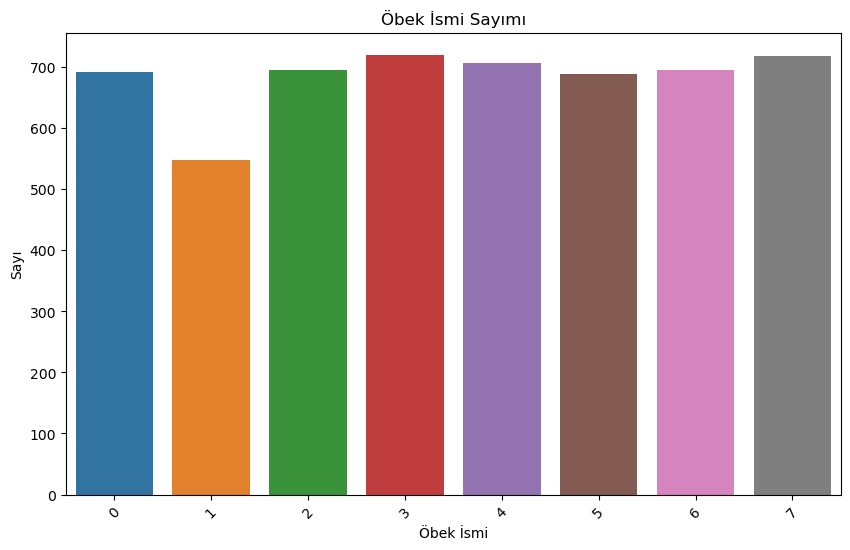

3    720
7    717
4    706
2    695
6    695
0    692
5    688
1    547
Name: Öbek İsmi, dtype: int64


In [14]:
# Öbeklerin denge durumları incelenmiştir.
counts = train_df['Öbek İsmi'].value_counts()
plt.figure(figsize=(10, 6))
sns.countplot(x='Öbek İsmi', data=train_df)
plt.title("Öbek İsmi Sayımı")
plt.xlabel("Öbek İsmi")
plt.ylabel("Sayı")
plt.xticks(rotation=45)
plt.show()
print(counts)

In [15]:
# Sınıf dengeleme işlemi gerçekleştirilmiştir. Azınlıkta olan sınıf adı 1 yani "Öbek 2" dir. 
from imblearn.over_sampling import SMOTE

X = train_df.drop(["Öbek İsmi"],axis=1) 
y = train_df["Öbek İsmi"] 

azinlik_sinifi = '1'

azinlik_ornekleri = X[y == azinlik_sinifi]

# SMOTE ile oversampling işlemi
smote = SMOTE()
oversampled_X, oversampled_y = smote.fit_resample(X, y)
train_df=pd.concat([oversampled_X,oversampled_y],axis=1)
train_df

,Cinsiyet,Medeni Durum,Yıllık Ortalama Gelir,Yıllık Ortalama Satın Alım Miktarı,Yıllık Ortalama Sipariş Verilen Ürün Adedi,Eğitime Devam Etme Durumu,Yıllık Ortalama Sepete Atılan Ürün Adedi,Yaş Grubu_18-30,Yaş Grubu_31-40,Yaş Grubu_41-50,...,İstihdam Durumu_Düzenli ve Ücretli Bir İşi Var,İstihdam Durumu_Emekli,İstihdam Durumu_Kendi İşinin Sahibi,İstihdam Durumu_İşsiz veya Düzenli Bir İşi Yok,En Çok İlgilendiği Ürün Grubu_Elektronik ve Teknolojik Ürünler,En Çok İlgilendiği Ürün Grubu_Ev ve Mobilya,En Çok İlgilendiği Ürün Grubu_Giyim,En Çok İlgilendiği Ürün Grubu_Kozmetik,En Çok İlgilendiği Ürün Grubu_Spor Malzemeleri,Öbek İsmi
0,0,0,748266.440879,32010.900881,37.310644,0,102.936904,0,1,0,...,1,0,0,0,1,0,0,0,0,3
1,1,1,246298.609605,4145.729891,11.554851,0,82.176053,0,0,0,...,0,0,1,0,0,0,0,0,1,4
2,1,0,268582.732360,9924.379414,55.353236,1,141.661426,1,0,0,...,1,0,0,0,0,0,1,0,0,7
3,1,1,327721.837865,6417.780714,15.417239,0,17.097397,0,0,0,...,0,0,1,0,0,0,1,0,0,2
4,1,1,397431.626948,7886.663061,14.689837,0,20.470459,0,1,0,...,0,0,0,1,0,0,1,0,0,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5755,0,0,354730.558410,27450.606471,18.037404,0,102.044193,0,1,0,...,1,0,0,0,0,1,0,0,0,6
5756,0,0,352705.826962,26950.739304,22.566783,0,112.271707,0,0,0,...,1,0,0,0,0,0,0,0,0,6
5757,1,0,258933.272803,8721.262010,55.844540,0,167.002635,1,0,0,...,0,0,0,0,0,0,0,0,0,7
5758,0,0,286578.455626,9856.963420,52.248016,1,131.798066,1,0,0,...,1,0,0,0,0,0,0,0,0,7


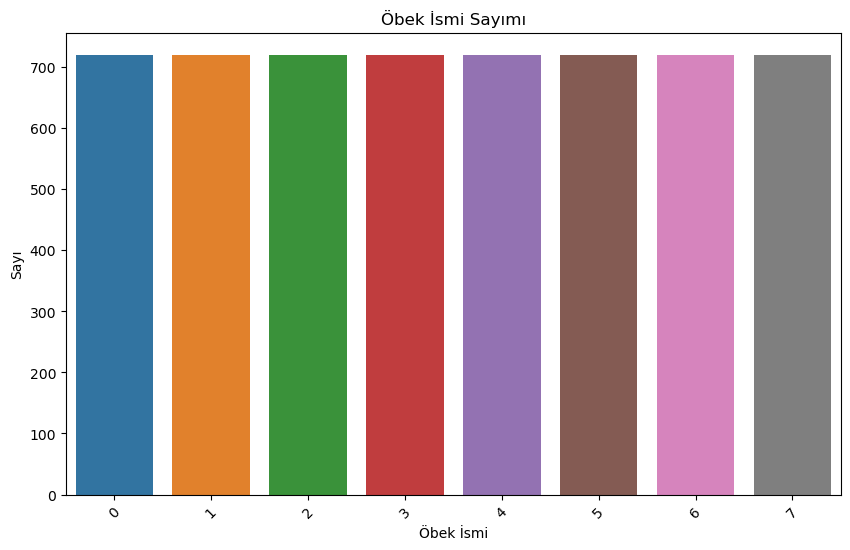

3    720
4    720
7    720
2    720
5    720
0    720
6    720
1    720
Name: Öbek İsmi, dtype: int64


In [16]:
# Öbeklerin denge durumları incelenmiştir.
counts = train_df['Öbek İsmi'].value_counts()
plt.figure(figsize=(10, 6))
sns.countplot(x='Öbek İsmi', data=train_df)
plt.title("Öbek İsmi Sayımı")
plt.xlabel("Öbek İsmi")
plt.ylabel("Sayı")
plt.xticks(rotation=45)
plt.show()
print(counts)

In [17]:
train_df.corr()["Öbek İsmi"].abs().nlargest(len(train_df.columns)) # Öbek İsmi sütunu ile korelasyonu yüksek olan değerler incelenmiştir. 

Öbek İsmi                                                         1.000000
Yıllık Ortalama Sepete Atılan Ürün Adedi                          0.735002
Yıllık Ortalama Sipariş Verilen Ürün Adedi                        0.587399
Eğitime Devam Etme Durumu                                         0.438409
Yıllık Ortalama Satın Alım Miktarı                                0.381939
Eğitim Düzeyi_Üniversite Mezunu                                   0.290645
Yaş Grubu_18-30                                                   0.262334
İstihdam Durumu_İşsiz veya Düzenli Bir İşi Yok                    0.258116
Medeni Durum                                                      0.226908
Eğitim Düzeyi_Eğitimsiz                                           0.220314
En Çok İlgilendiği Ürün Grubu_Giyim                               0.220238
İstihdam Durumu_Düzenli ve Ücretli Bir İşi Var                    0.212963
Eğitim Düzeyi_İlkokul Mezunu                                      0.193855
Eğitim Düzeyi_Ortaokul Me

In [18]:
# Yukarıdaki incelemeye göre özellik arttırma işlemi yapılmıştır.
train_df["Satın Alım Sepet Oranı"]=train_df["Yıllık Ortalama Satın Alım Miktarı"]/train_df["Yıllık Ortalama Sepete Atılan Ürün Adedi"]  

In [19]:
# Yukarıdaki incelemeye göre özellik arttırma işlemi yapılmıştır.
train_df["Satın Alım Sipariş Oranı"]=train_df["Yıllık Ortalama Sepete Atılan Ürün Adedi"]/train_df["Yıllık Ortalama Sipariş Verilen Ürün Adedi"] 

In [20]:
train_df.corr()["Öbek İsmi"].abs().nlargest(len(train_df.columns)) # Öbek İsmi sütunu ile korelasyonu yüksek olan değerler incelenmiştir. Ekstra olarak yeni eklenen özellikler gözlemlenmiştir.

Öbek İsmi                                                         1.000000
Yıllık Ortalama Sepete Atılan Ürün Adedi                          0.735002
Yıllık Ortalama Sipariş Verilen Ürün Adedi                        0.587399
Eğitime Devam Etme Durumu                                         0.438409
Yıllık Ortalama Satın Alım Miktarı                                0.381939
Eğitim Düzeyi_Üniversite Mezunu                                   0.290645
Yaş Grubu_18-30                                                   0.262334
İstihdam Durumu_İşsiz veya Düzenli Bir İşi Yok                    0.258116
Medeni Durum                                                      0.226908
Eğitim Düzeyi_Eğitimsiz                                           0.220314
En Çok İlgilendiği Ürün Grubu_Giyim                               0.220238
İstihdam Durumu_Düzenli ve Ücretli Bir İşi Var                    0.212963
Eğitim Düzeyi_İlkokul Mezunu                                      0.193855
Eğitim Düzeyi_Ortaokul Me

In [21]:
# Outlier Threshold'ların belirlenmesi:
# Aykırı değer analizi bu fonksiyon ile yapılmıştır.
def outlier_thresholds(dataframe, col_name, q1=0.25, q3=0.75):
    q1 = dataframe[col_name].quantile(q1)  # 1.Çeyrek
    q3 = dataframe[col_name].quantile(q3)  # 3.Çeyrek
    interquantile_range = q3 - q1  # range'i hesaplayalım
    low_limit = q1 - 1.5 * interquantile_range # low & up limit:
    up_limit = q3 + 1.5 * interquantile_range
    return low_limit, up_limit
    
# Baskılama yöntemi:
# Aykırı değerler tespit edildikten sonra durumuna göre up_limit veya low_limite eşitlenmiştir.
def replace_with_thresholds(dataframe, variable):
    low_limit, up_limit = outlier_thresholds(dataframe, variable)
    dataframe.loc[(dataframe[variable] > up_limit), variable] = up_limit
    dataframe.loc[(dataframe[variable] < low_limit), variable] = low_limit

# Aykırı değer bulunuyor mu bulunmuyor mu diye görselleştirme bu fonksiyon ile yapılmıştır.
def sub_plt_outliers(dataframe,is_outlier_cols):
    list_length=len(is_outlier_cols)
    fig, axes = plt.subplots(list_length, 1,figsize=(14,list_length*2))
    
    out_sayac=0
    for i in range(list_length):
        sns.boxplot(data=dataframe, x=is_outlier_cols[out_sayac], ax=axes[i]) 
        axes[i].set_title('{} Sütunun Outlier Tablosu'.format(is_outlier_cols[out_sayac]))
        axes[i].set_xlabel(is_outlier_cols[out_sayac])
        out_sayac+=1
        
    plt.tight_layout()
    plt.show()

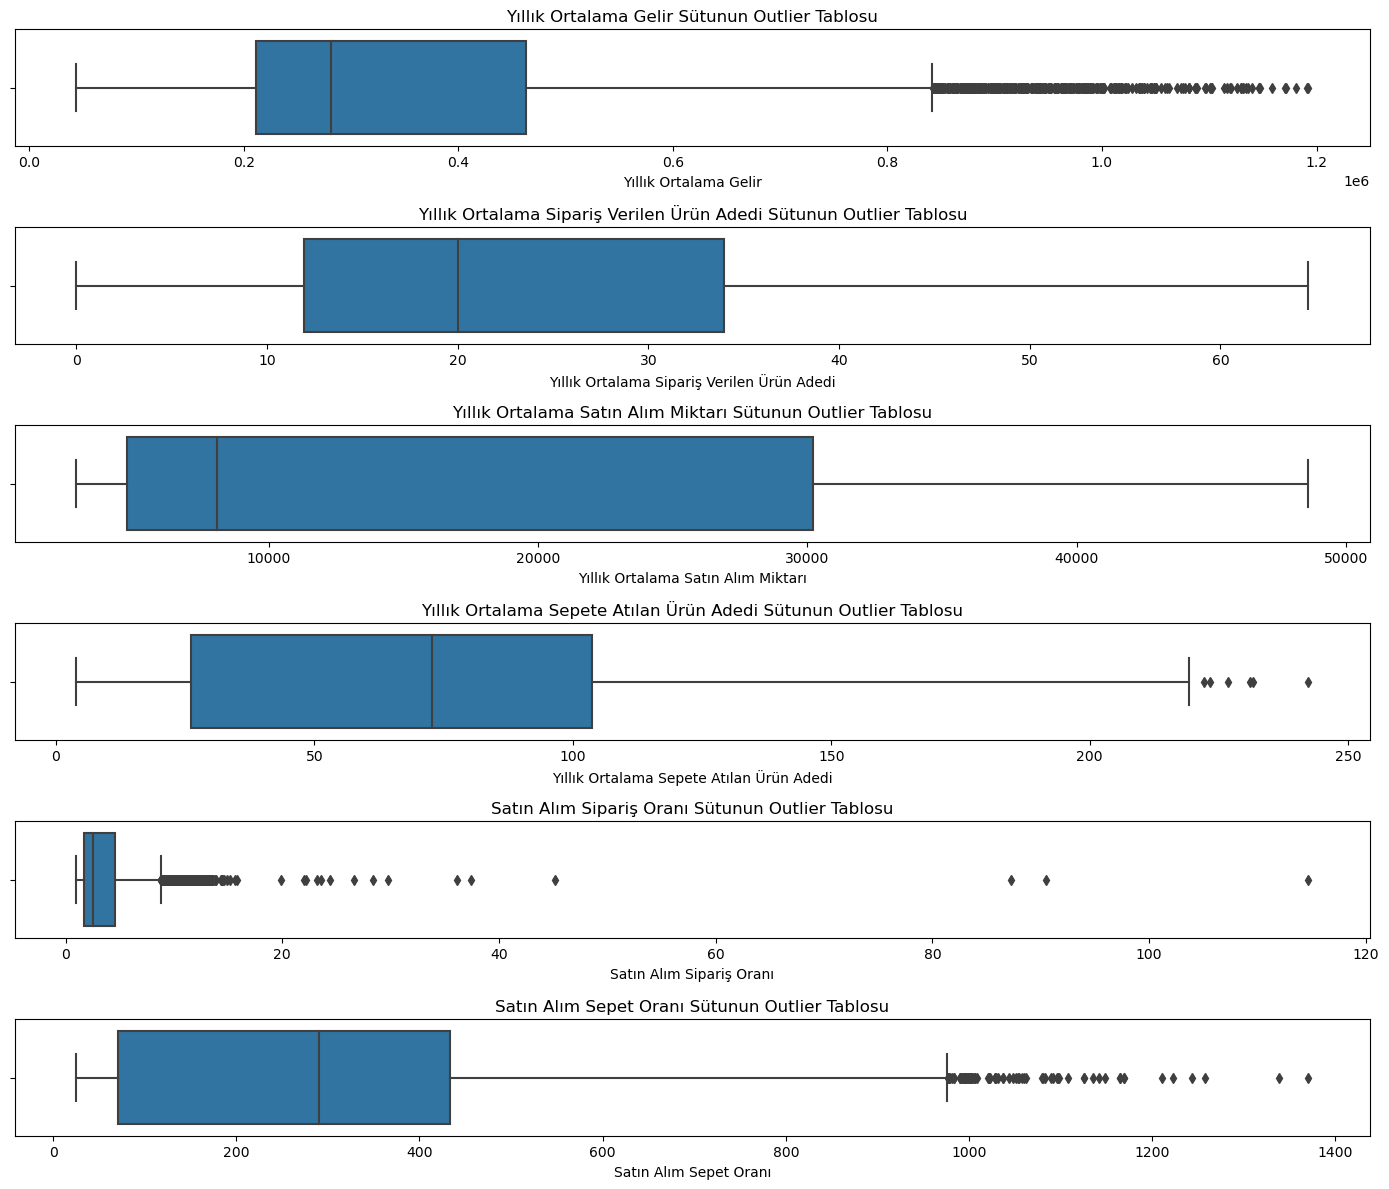

In [22]:
sub_plt_outliers(dataframe=train_df,is_outlier_cols=["Yıllık Ortalama Gelir","Yıllık Ortalama Sipariş Verilen Ürün Adedi",
                                                     "Yıllık Ortalama Satın Alım Miktarı","Yıllık Ortalama Sepete Atılan Ürün Adedi",
                                                     "Satın Alım Sipariş Oranı","Satın Alım Sepet Oranı"])

In [23]:
replace_with_thresholds(train_df,"Yıllık Ortalama Sepete Atılan Ürün Adedi")
replace_with_thresholds(train_df,"Yıllık Ortalama Gelir")
replace_with_thresholds(train_df,"Satın Alım Sipariş Oranı")
replace_with_thresholds(train_df,"Satın Alım Sepet Oranı")

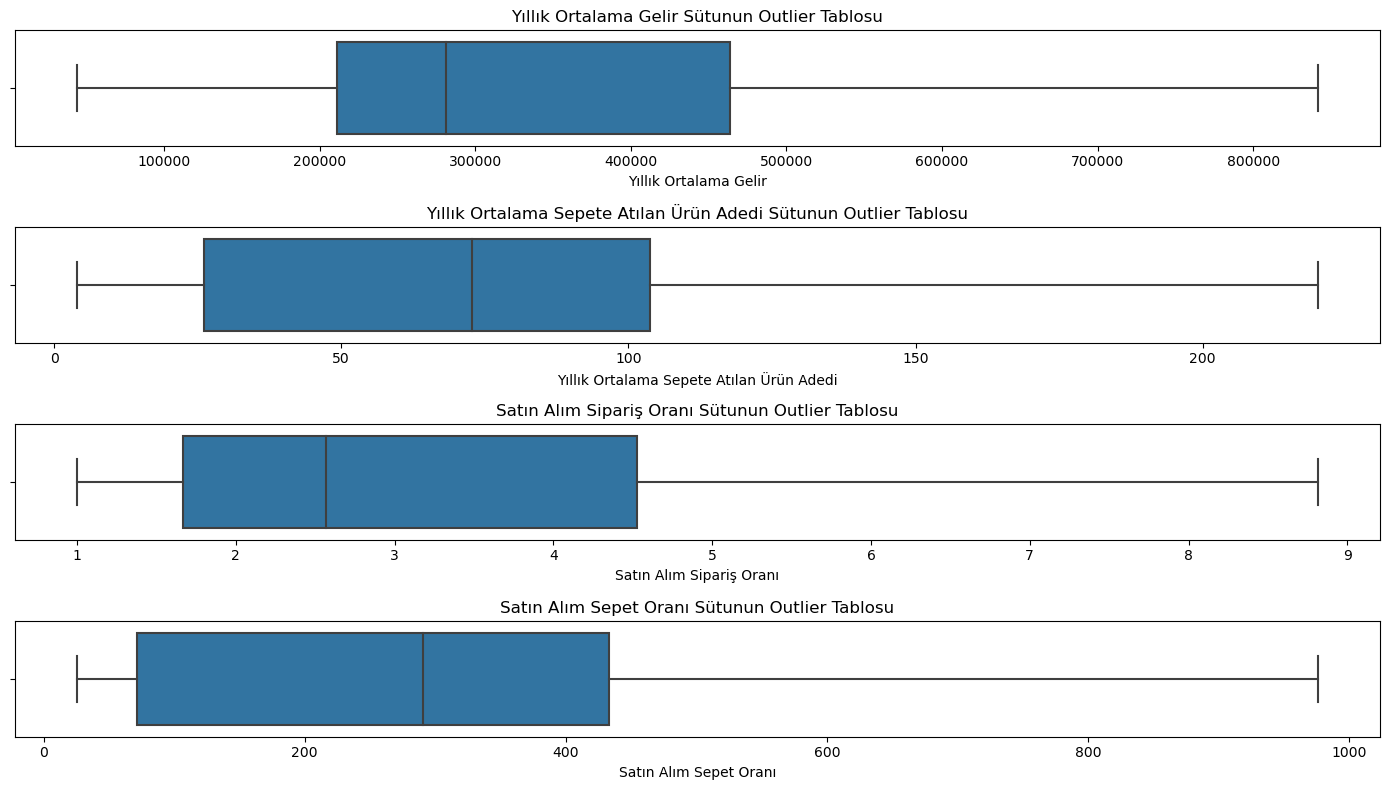

In [24]:
sub_plt_outliers(dataframe=train_df,is_outlier_cols=["Yıllık Ortalama Gelir","Yıllık Ortalama Sepete Atılan Ürün Adedi","Satın Alım Sipariş Oranı","Satın Alım Sepet Oranı"])

In [25]:
pd.set_option('display.max_columns', None) 
train_df.head()

,Cinsiyet,Medeni Durum,Yıllık Ortalama Gelir,Yıllık Ortalama Satın Alım Miktarı,Yıllık Ortalama Sipariş Verilen Ürün Adedi,Eğitime Devam Etme Durumu,Yıllık Ortalama Sepete Atılan Ürün Adedi,Yaş Grubu_18-30,Yaş Grubu_31-40,Yaş Grubu_41-50,Yaş Grubu_51-60,Yaş Grubu_>60,Eğitim Düzeyi_Doktora Mezunu,Eğitim Düzeyi_Doktora Ötesi,Eğitim Düzeyi_Eğitimsiz,Eğitim Düzeyi_Lise Mezunu,Eğitim Düzeyi_Ortaokul Mezunu,Eğitim Düzeyi_Yüksek Lisans Mezunu,Eğitim Düzeyi_Yüksekokul Mezunu,Eğitim Düzeyi_Üniversite Mezunu,Eğitim Düzeyi_İlkokul Mezunu,Yaşadığı Şehir_Büyük Şehir,Yaşadığı Şehir_Köy veya Kasaba,Yaşadığı Şehir_Küçük Şehir,Yaşadığı Şehir_Kırsal,İstihdam Durumu_Düzenli ve Ücretli Bir İşi Var,İstihdam Durumu_Emekli,İstihdam Durumu_Kendi İşinin Sahibi,İstihdam Durumu_İşsiz veya Düzenli Bir İşi Yok,En Çok İlgilendiği Ürün Grubu_Elektronik ve Teknolojik Ürünler,En Çok İlgilendiği Ürün Grubu_Ev ve Mobilya,En Çok İlgilendiği Ürün Grubu_Giyim,En Çok İlgilendiği Ürün Grubu_Kozmetik,En Çok İlgilendiği Ürün Grubu_Spor Malzemeleri,Öbek İsmi,Satın Alım Sepet Oranı,Satın Alım Sipariş Oranı
0,0,0,748266.440879,32010.900881,37.310644,0,102.936904,0,1,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,1,0,0,0,1,0,0,0,0,3,310.975944,2.758915
1,1,1,246298.609605,4145.729891,11.554851,0,82.176053,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,1,4,50.449367,7.111823
2,1,0,268582.732360,9924.379414,55.353236,1,141.661426,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,1,0,0,7,70.057035,2.559226
3,1,1,327721.837865,6417.780714,15.417239,0,17.097397,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,1,0,0,2,375.365947,1.108979
4,1,1,397431.626948,7886.663061,14.689837,0,20.470459,0,1,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,1,0,0,1,0,0,2,385.270462,1.393512


In [26]:
# Bu kısımda scale işlemi yapılmaktadır. Büyük aralıkta olan değerleri daha küçük aralıklara dönüştürme işlemi.
from sklearn.preprocessing import StandardScaler 
scaler =  StandardScaler()
scaler_columns=["Yıllık Ortalama Gelir","Yıllık Ortalama Satın Alım Miktarı",
 "Yıllık Ortalama Sipariş Verilen Ürün Adedi","Yıllık Ortalama Sepete Atılan Ürün Adedi","Satın Alım Sepet Oranı","Satın Alım Sipariş Oranı"]
data_to_scale = train_df[scaler_columns]
scaled_data = scaler.fit_transform(data_to_scale)
train_df[scaler_columns] = scaled_data

In [27]:
X=train_df.drop(["Öbek İsmi"],axis=1)
Y=train_df[["Öbek İsmi"]]

In [28]:
X.head()

,Cinsiyet,Medeni Durum,Yıllık Ortalama Gelir,Yıllık Ortalama Satın Alım Miktarı,Yıllık Ortalama Sipariş Verilen Ürün Adedi,Eğitime Devam Etme Durumu,Yıllık Ortalama Sepete Atılan Ürün Adedi,Yaş Grubu_18-30,Yaş Grubu_31-40,Yaş Grubu_41-50,Yaş Grubu_51-60,Yaş Grubu_>60,Eğitim Düzeyi_Doktora Mezunu,Eğitim Düzeyi_Doktora Ötesi,Eğitim Düzeyi_Eğitimsiz,Eğitim Düzeyi_Lise Mezunu,Eğitim Düzeyi_Ortaokul Mezunu,Eğitim Düzeyi_Yüksek Lisans Mezunu,Eğitim Düzeyi_Yüksekokul Mezunu,Eğitim Düzeyi_Üniversite Mezunu,Eğitim Düzeyi_İlkokul Mezunu,Yaşadığı Şehir_Büyük Şehir,Yaşadığı Şehir_Köy veya Kasaba,Yaşadığı Şehir_Küçük Şehir,Yaşadığı Şehir_Kırsal,İstihdam Durumu_Düzenli ve Ücretli Bir İşi Var,İstihdam Durumu_Emekli,İstihdam Durumu_Kendi İşinin Sahibi,İstihdam Durumu_İşsiz veya Düzenli Bir İşi Yok,En Çok İlgilendiği Ürün Grubu_Elektronik ve Teknolojik Ürünler,En Çok İlgilendiği Ürün Grubu_Ev ve Mobilya,En Çok İlgilendiği Ürün Grubu_Giyim,En Çok İlgilendiği Ürün Grubu_Kozmetik,En Çok İlgilendiği Ürün Grubu_Spor Malzemeleri,Satın Alım Sepet Oranı,Satın Alım Sipariş Oranı
0,0,0,2.012690,1.113103,0.918639,0,0.656501,0,1,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,1,0,0,0,1,0,0,0,0,-0.026840,-0.296931
1,1,1,-0.526464,-0.865377,-0.832914,0,0.211010,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,1,-1.020741,1.492680
2,1,0,-0.413742,-0.455082,2.145647,1,1.487460,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,1,0,0,-0.945938,-0.379030
3,1,1,-0.114593,-0.704057,-0.570248,0,-1.185462,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,1,0,0,0.218806,-0.975270
4,1,1,0.238027,-0.599764,-0.619716,0,-1.113082,0,1,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,1,0,0,1,0,0,0.256591,-0.858290


In [29]:
Y.head()

,Öbek İsmi
0,3
1,4
2,7
3,2
4,2


# **TEST VERİ SETİNİN YÜKLENMESİ VE GEREKLİ ADIMLAR**

In [30]:
test_df=pd.read_csv("/kaggle/input/datathon2023/test_x.csv")
test_df.head()

,index,Cinsiyet,Yaş Grubu,Medeni Durum,Eğitim Düzeyi,İstihdam Durumu,Yıllık Ortalama Gelir,Yaşadığı Şehir,En Çok İlgilendiği Ürün Grubu,Yıllık Ortalama Satın Alım Miktarı,Yıllık Ortalama Sipariş Verilen Ürün Adedi,Eğitime Devam Etme Durumu,Yıllık Ortalama Sepete Atılan Ürün Adedi
0,0,Erkek,51-60,Evli,Yüksek Lisans Mezunu,Düzenli ve Ücretli Bir İşi Var,365331.930346,Köy veya Kasaba,Giyim,5566.587664,15.442635,Etmiyor,19.646460
1,1,Erkek,41-50,Bekar,Lise Mezunu,İşsiz veya Düzenli Bir İşi Yok,414899.236174,Büyük Şehir,Spor Malzemeleri,6756.766203,14.957246,Etmiyor,19.675863
2,2,Kadın,>60,Evli,Eğitimsiz,İşsiz veya Düzenli Bir İşi Yok,152825.872271,Küçük Şehir,Giyim,4493.915682,10.907930,Etmiyor,46.904518
3,3,Kadın,51-60,Evli,Doktora Ötesi,Düzenli ve Ücretli Bir İşi Var,489052.908472,Köy veya Kasaba,Kozmetik,42670.646595,32.333021,Etmiyor,48.083609
4,4,Erkek,18-30,Evli,Yüksek Lisans Mezunu,Kendi İşinin Sahibi,323635.711534,Küçük Şehir,Giyim,5959.266948,4.519968,Etmiyor,12.752491


In [31]:
test_df=test_df.drop(["index"],axis=1) # İndex özelliği bir anlam taşımadığından dolayı veri setinden çıkarılmıştır.

In [32]:
# Bu kısımda kategorik değişkenler sayısal hale dönüştürülmüştür. Kukla değişken tuzağı dikkate alınmıştır.  
test_df["Cinsiyet"] =test_df["Cinsiyet"].replace(["Erkek"],1)
test_df["Cinsiyet"] =test_df["Cinsiyet"].replace(["Kadın"],0)
test_df["Medeni Durum"] =test_df["Medeni Durum"].replace(["Evli"],1)
test_df["Medeni Durum"] =test_df["Medeni Durum"].replace(["Bekar"],0)
test_df["Eğitime Devam Etme Durumu"] =test_df["Eğitime Devam Etme Durumu"].replace(["Ediyor"],1)
test_df["Eğitime Devam Etme Durumu"] =test_df["Eğitime Devam Etme Durumu"].replace(["Etmiyor"],0)
test_df = pd.get_dummies(test_df, columns=['Yaş Grubu','Eğitim Düzeyi','Yaşadığı Şehir', 'İstihdam Durumu', 'En Çok İlgilendiği Ürün Grubu'])

In [33]:
# Özellik arttırma işlemi yapılmıştır.
test_df["Satın Alım Sepet Oranı"]=test_df["Yıllık Ortalama Satın Alım Miktarı"]/test_df["Yıllık Ortalama Sepete Atılan Ürün Adedi"] 

In [34]:
# Özellik arttırma işlemi yapılmıştır.
test_df["Satın Alım Sipariş Oranı"]=test_df["Yıllık Ortalama Sepete Atılan Ürün Adedi"]/test_df["Yıllık Ortalama Sipariş Verilen Ürün Adedi"] 

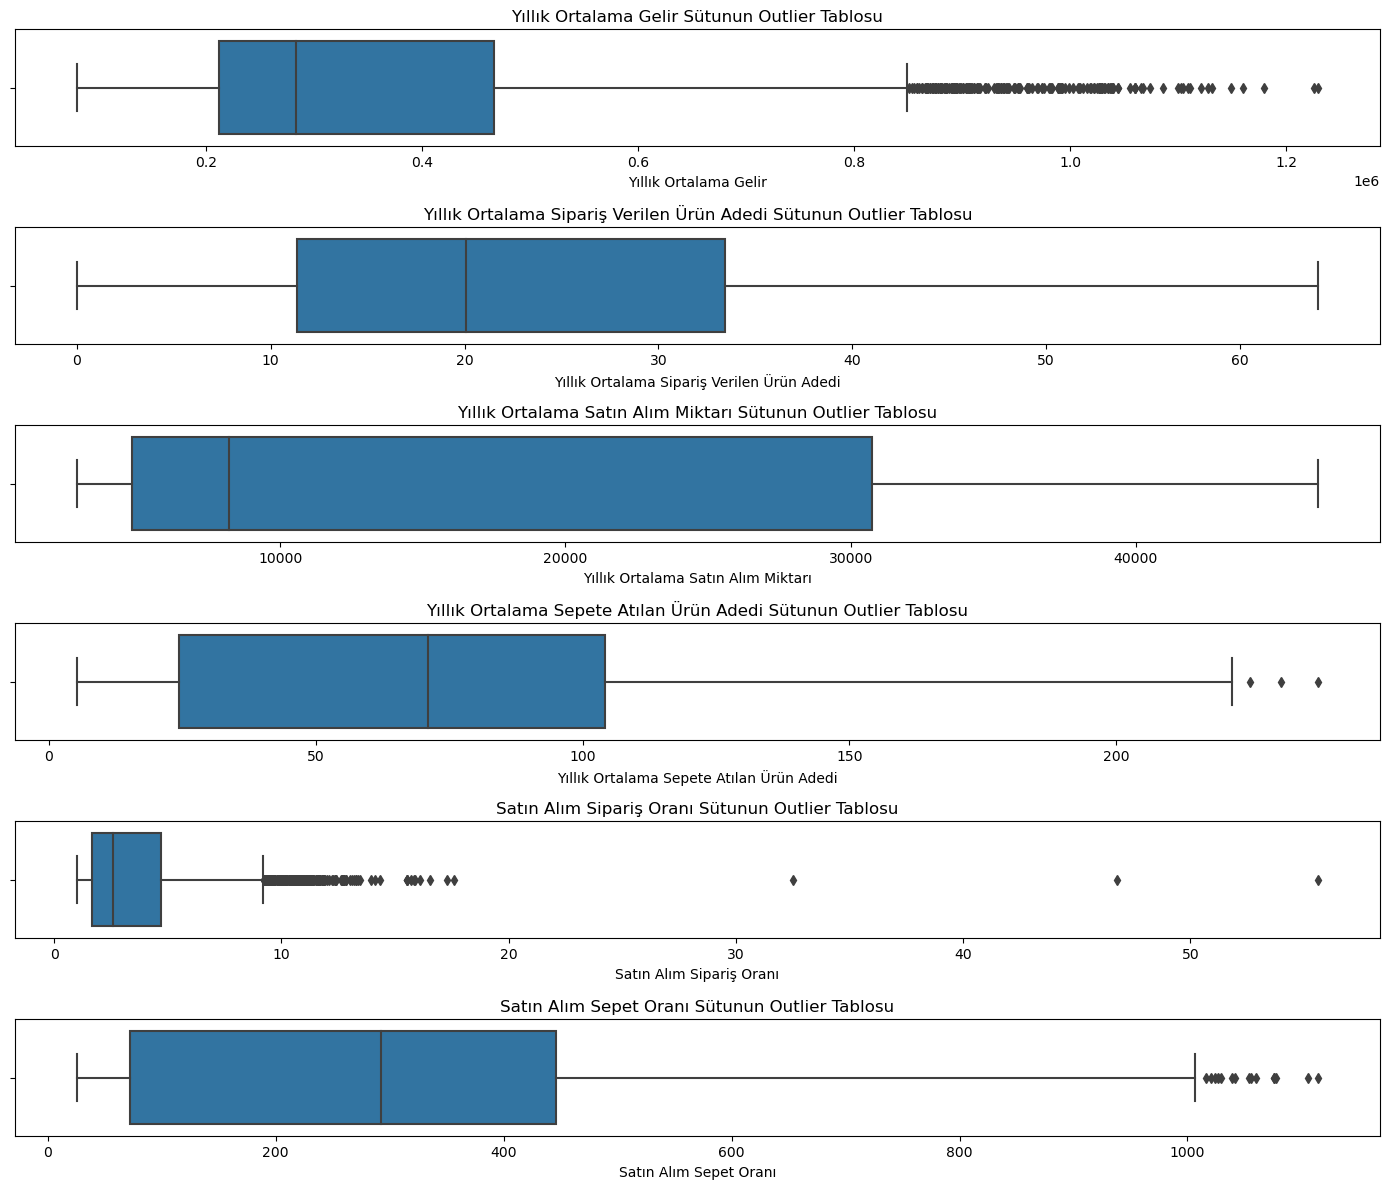

In [35]:
sub_plt_outliers(dataframe=test_df,is_outlier_cols=["Yıllık Ortalama Gelir","Yıllık Ortalama Sipariş Verilen Ürün Adedi",
                                                     "Yıllık Ortalama Satın Alım Miktarı","Yıllık Ortalama Sepete Atılan Ürün Adedi",
                                                     "Satın Alım Sipariş Oranı","Satın Alım Sepet Oranı"])

In [36]:
replace_with_thresholds(test_df,"Yıllık Ortalama Sepete Atılan Ürün Adedi")
replace_with_thresholds(test_df,"Yıllık Ortalama Gelir")
replace_with_thresholds(test_df,"Satın Alım Sipariş Oranı")
replace_with_thresholds(test_df,"Satın Alım Sepet Oranı")

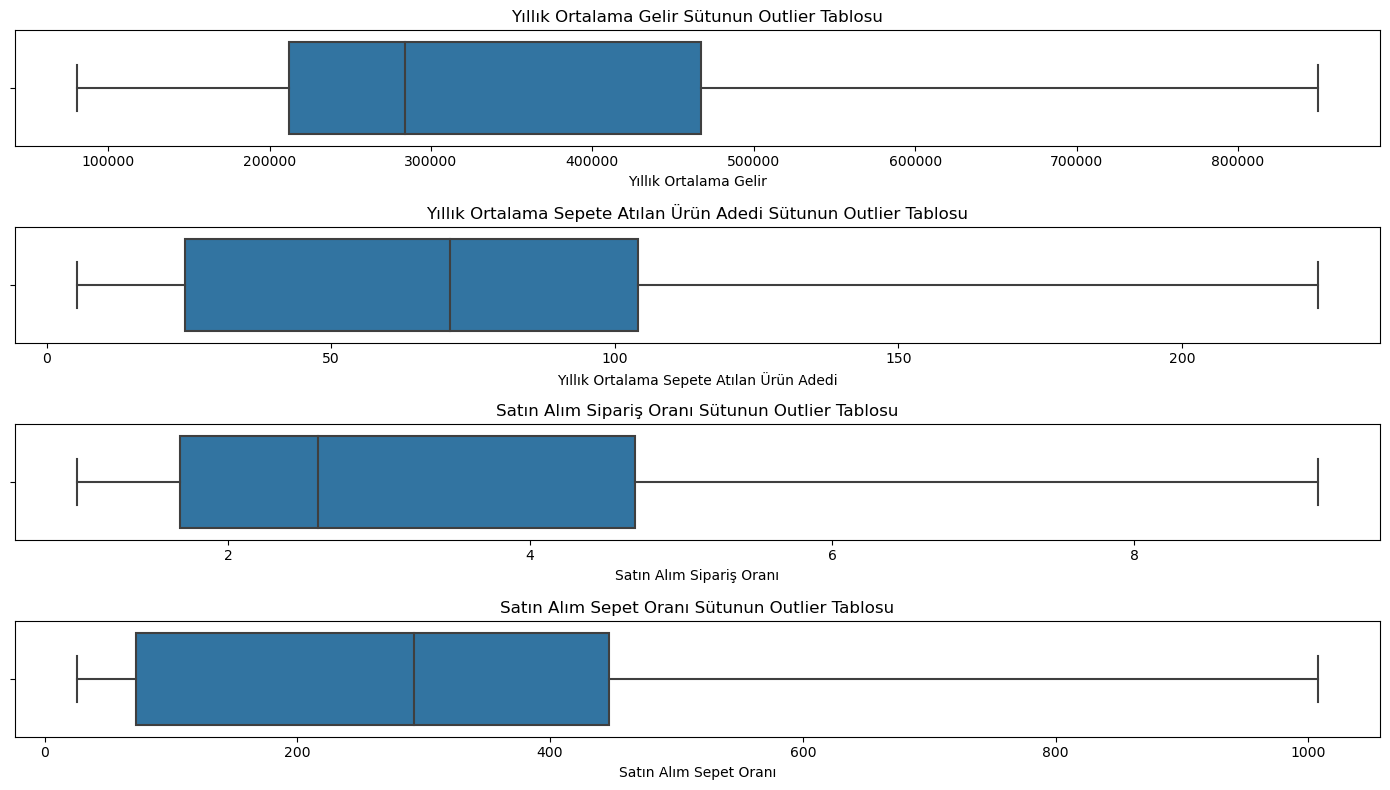

In [37]:
sub_plt_outliers(dataframe=test_df,is_outlier_cols=["Yıllık Ortalama Gelir","Yıllık Ortalama Sepete Atılan Ürün Adedi","Satın Alım Sipariş Oranı","Satın Alım Sepet Oranı"])

In [38]:
# Bu kısımda scale işlemi yapılmaktadır. Büyük aralıkta olan değerleri daha küçük aralıklara dönüştürme işlemi.
scaler =  StandardScaler()
scaler_columns=["Yıllık Ortalama Gelir","Yıllık Ortalama Satın Alım Miktarı",
 "Yıllık Ortalama Sipariş Verilen Ürün Adedi","Yıllık Ortalama Sepete Atılan Ürün Adedi","Satın Alım Sipariş Oranı","Satın Alım Sepet Oranı"]
data_to_scale = test_df[scaler_columns]
scaled_data = scaler.fit_transform(data_to_scale)
test_df[scaler_columns] = scaled_data

In [39]:
test_df

,Cinsiyet,Medeni Durum,Yıllık Ortalama Gelir,Yıllık Ortalama Satın Alım Miktarı,Yıllık Ortalama Sipariş Verilen Ürün Adedi,Eğitime Devam Etme Durumu,Yıllık Ortalama Sepete Atılan Ürün Adedi,Yaş Grubu_18-30,Yaş Grubu_31-40,Yaş Grubu_41-50,Yaş Grubu_51-60,Yaş Grubu_>60,Eğitim Düzeyi_Doktora Mezunu,Eğitim Düzeyi_Doktora Ötesi,Eğitim Düzeyi_Eğitimsiz,Eğitim Düzeyi_Lise Mezunu,Eğitim Düzeyi_Ortaokul Mezunu,Eğitim Düzeyi_Yüksek Lisans Mezunu,Eğitim Düzeyi_Yüksekokul Mezunu,Eğitim Düzeyi_Üniversite Mezunu,Eğitim Düzeyi_İlkokul Mezunu,Yaşadığı Şehir_Büyük Şehir,Yaşadığı Şehir_Köy veya Kasaba,Yaşadığı Şehir_Küçük Şehir,Yaşadığı Şehir_Kırsal,İstihdam Durumu_Düzenli ve Ücretli Bir İşi Var,İstihdam Durumu_Emekli,İstihdam Durumu_Kendi İşinin Sahibi,İstihdam Durumu_İşsiz veya Düzenli Bir İşi Yok,En Çok İlgilendiği Ürün Grubu_Elektronik ve Teknolojik Ürünler,En Çok İlgilendiği Ürün Grubu_Ev ve Mobilya,En Çok İlgilendiği Ürün Grubu_Giyim,En Çok İlgilendiği Ürün Grubu_Kozmetik,En Çok İlgilendiği Ürün Grubu_Spor Malzemeleri,Satın Alım Sepet Oranı,Satın Alım Sipariş Oranı
0,1,1,0.054791,-0.778776,-0.551195,0,-1.132984,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,1,0,0,1,0,0,0,0,0,1,0,0,-0.156182,-0.900324
1,1,0,0.300701,-0.695331,-0.584541,0,-1.132349,0,0,1,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,1,0.071884,-0.883392
2,0,1,-0.999480,-0.853982,-0.862732,0,-0.543874,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,1,0,0,-0.868215,0.284994
3,0,1,0.668588,1.822635,0.609184,0,-0.518391,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,1,0,2.137504,-0.816190
4,1,1,-0.152069,-0.751244,-1.301588,0,-1.281979,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,1,0,0,0,1,0,0,0.542319,-0.293870
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2335,0,0,-0.471793,-0.498852,1.265318,1,0.984619,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,1,0,0,1,0,0,0,-0.923437,-0.298931
2336,0,1,-0.792329,-0.883687,-0.232400,0,-0.570779,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,1,0,1,0,0,0,-0.893529,-0.508329
2337,1,1,0.017080,0.414701,-0.312140,0,0.618584,0,0,0,0,1,0,0,0,0,0,1,0,0,0,1,0,0,0,1,0,0,0,0,1,0,0,0,-0.380190,0.684796
2338,1,1,-0.700057,-0.874211,-0.873025,0,0.555639,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,1,-1.068696,2.159702


# **KULLANILAN MAKİNE ÖĞRENMESİ ALGORİTMALARI**

#### Makine öğrenmesi algoritması olarak **Random Forest, XGBoost ve VotingClassifier(RandomForest,XGBoost,LGBMClassifier)** kullanılmış ve en yüksek başarımlar bir çok deneme yapılarak bu algoritmalar ile elde edilmiştir. 
#### Random Forest Algoritması aktif halde bırakıp diğer algoritmalar açıklama satırı içine alınarak deaktif konuma getirilmiştir. 

In [40]:
from sklearn.ensemble import  RandomForestClassifier
#Random Forest Classifier ile model eğitimi
model = RandomForestClassifier(n_estimators=100,
    max_depth=7,
    min_samples_split=4,
    min_samples_leaf=1,
    max_features='sqrt',
    random_state=0)
model.fit(X, Y)

# Test veri seti üzerinde tahmin yapma
sonuclar = model.predict(test_df.values)
karsilikli_cevap = {0:'obek_1', 1:'obek_2', 2:'obek_3', 3:'obek_4', 4:'obek_5', 5:'obek_6', 6:'obek_7', 7:'obek_8'}
sonuclar=[karsilikli_cevap[i] for i in sonuclar]

In [41]:
"""from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score

xgb = XGBClassifier(eval_metric="aucpr",max_depth=7)
xgb.fit(X,Y)
tahmin_sonuclari = xgb.predict(test_df.values)
karsilikli_cevap = {0:'obek_1', 1:'obek_2', 2:'obek_3', 3:'obek_4', 4:'obek_5', 5:'obek_6', 6:'obek_7', 7:'obek_8'}
sonuclar=[karsilikli_cevap[i] for i in tahmin_sonuclari]""" 

'from xgboost import XGBClassifier\nfrom sklearn.metrics import accuracy_score\n\nxgb = XGBClassifier(eval_metric="aucpr",max_depth=7)\nxgb.fit(X,Y)\ntahmin_sonuclari = xgb.predict(test_df.values)\nkarsilikli_cevap = {0:\'obek_1\', 1:\'obek_2\', 2:\'obek_3\', 3:\'obek_4\', 4:\'obek_5\', 5:\'obek_6\', 6:\'obek_7\', 7:\'obek_8\'}\nsonuclar=[karsilikli_cevap[i] for i in tahmin_sonuclari]'

In [42]:
"""from xgboost import XGBClassifier
from lightgbm import LGBMClassifier
from sklearn.ensemble import VotingClassifier, RandomForestClassifier
from sklearn.metrics import accuracy_score
xgb = XGBClassifier(eval_metric="aucpr",max_depth=7)
rf = RandomForestClassifier(n_estimators=100, random_state=42)
lgbm = LGBMClassifier(random_state=42)
model = VotingClassifier(estimators=[('xgb',xgb), ('rf', rf), ('lgbm', lgbm)], voting='hard')
model.fit(X, Y)
y_pred = model.predict(test_df.values)
karsilikli_cevap = {0:'obek_1', 1:'obek_2', 2:'obek_3', 3:'obek_4', 4:'obek_5', 5:'obek_6', 6:'obek_7', 7:'obek_8'}
sonuclar=[karsilikli_cevap[i] for i in y_pred]
"""

'from xgboost import XGBClassifier\nfrom lightgbm import LGBMClassifier\nfrom sklearn.ensemble import VotingClassifier, RandomForestClassifier\nfrom sklearn.metrics import accuracy_score\nxgb = XGBClassifier(eval_metric="aucpr",max_depth=7)\nrf = RandomForestClassifier(n_estimators=100, random_state=42)\nlgbm = LGBMClassifier(random_state=42)\nmodel = VotingClassifier(estimators=[(\'xgb\',xgb), (\'rf\', rf), (\'lgbm\', lgbm)], voting=\'hard\')\nmodel.fit(X, Y)\ny_pred = model.predict(test_df.values)\nkarsilikli_cevap = {0:\'obek_1\', 1:\'obek_2\', 2:\'obek_3\', 3:\'obek_4\', 4:\'obek_5\', 5:\'obek_6\', 6:\'obek_7\', 7:\'obek_8\'}\nsonuclar=[karsilikli_cevap[i] for i in y_pred]\n'

In [43]:
data = {
    'id': range(2340),
    'Öbek İsmi': sonuclar
}
Predict_Dataframe = pd.DataFrame(data)
Predict_Dataframe.set_index('id', inplace=True)
Predict_Dataframe

,Öbek İsmi
id,
0,obek_3
1,obek_3
2,obek_2
3,obek_6
4,obek_1
...,...
2335,obek_8
2336,obek_2
2337,obek_7


In [44]:
Predict_Dataframe.to_csv('submission.csv')